## Implementing Layers in Convolutional Neural Networks

This notebook contains code that implements the convolution, max-pooling and softmax layers using PyTorch.

In [1]:
import numpy as np
import cv2
import time
import os

from IPython.core.display import display,Image

import torch
import torch.nn.functional as F
from torch import nn

# Enable inline plotting
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Make the graphs a bit prettier, and bigger
sns.set(font_scale = 1.5)
sns.set_style("ticks")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
plt.rcParams['figure.figsize'] = (8, 6)
IMAGES_DIRECTORY = 'image/'
def show_img(image):
    tmp_img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(tmp_img)
    plt.axis('off')

C:\Users\swats\AppData\Local\Temp\ipykernel_15676\3898115188.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display,Image


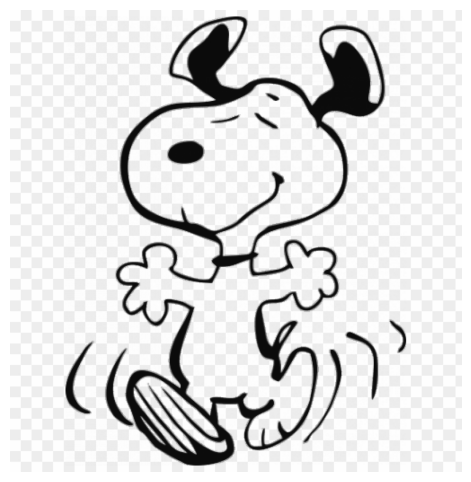

In [2]:
fx_kernel=np.array([[1,-1], [1,-1]]) 
fy_kernel=np.array([[1,1], [-1,-1]])
    
image_name ='snoopy.png'
image = cv2.imread(IMAGES_DIRECTORY + image_name, 0)
show_img(image)



## Convolutional Layer
Uses `torch.nn.Conv2d` to apply a filter (kernel) to the input image. Official documentation for reference: [https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html](https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html)

- Image is a 3-dimensional tensor with shape [height, width, 3], where 3 represents the Red, Green Blue channels.
- Kernel is a small tensor with shape [kernel_height, kernel_width, 3].
- Image and kernel are in Numpy array format.





In [7]:
def torch_convolution(image, kernel):
    # Transforms image and kernel into pytorch tensors which can be fit into torch.nn.Conv2d. 
    # Stores the result of the transformation is in tensor_image and tensor_kernel.
    tensor_image = None
    tensor_kernel = None




    tensor_image = torch.from_numpy(image).permute((2,0,1))
    tensor_image = torch.unsqueeze(tensor_image, 0)
    print(tensor_image.size())
    
    tensor_kernel = torch.from_numpy(kernel)
    tensor_kernel = torch.unsqueeze(tensor_kernel, 0) # ???
    print(tensor_kernel.size())
    
    
    return F.conv2d(input=tensor_image, weight=tensor_kernel, stride=1)

In [8]:
# For debugging, can check the shapes of the tensors by running this
input_images=np.random.randint(low=0, high=256,size=(40,30,3))
print("input_images.shape:",input_images.shape)
input_kernel=np.random.randint(low=0, high=256,size=(3,3,3))
print("input_kernel.shape:",input_kernel.shape)
output=torch_convolution(input_images, input_kernel)
print("output.shape:",output.shape)

input_images.shape: (40, 30, 3)
input_kernel.shape: (3, 3, 3)
torch.Size([1, 3, 40, 30])
torch.Size([1, 3, 3, 3])
output.shape: torch.Size([1, 1, 38, 28])


## ReLU activation function

$$
ReLU(x)=\max(0,x)
$$

If the input is a vector or matrix, the ReLU is applied elementwisely: Assume we have $x\in\mathbb{R}^{n\times m}$

$$
ReLU(x_{i,j})=\max(0,x_{ij}), \text{ for } 1\le i\le n, 1\le j\le m
$$

Officail documentation for reference:
[https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)


In [10]:
def relu(x):
    m = torch.nn.ReLU()
    return m(x)

In [14]:
# To test relu function implementation:
x=torch.randn(2)
print("the input shape:", x.shape,"input:", x)
output=relu(x)
print("the output shape:", output.shape, "output:",  output)

the input shape: torch.Size([2]) input: tensor([-1.0862, -3.6460])
the output shape: torch.Size([2]) output: tensor([0., 0.])


## Max-pooling layer

The pooling layer can downsample the output from the convolution operation.

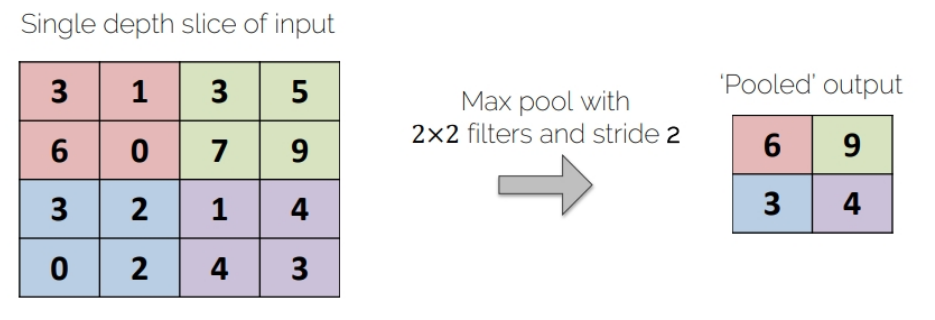

Documentation of  **`torch.nn.MaxPool2d`** for reference: [https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)

The following function implements max pooling with 2x2 kernel size, and (2,2) stride, as shown in the graph.

In [15]:
def max_pooling(inputs):
    m = torch.nn.MaxPool2d((2,2), stride=(2,2))
    return m(inputs)
    


In [18]:
# For rough testing:
input_feat = torch.randn(20, 16, 50, 32)
print("input_feat.shape:", input_feat.shape)
output = max_pooling(input_feat)
print("output.shape:", output.shape)
# output.shape should be [20, 16, 25, 16]

input_feat.shape: torch.Size([20, 16, 50, 32])
output.shape: torch.Size([20, 16, 25, 16])


## The linear layer
Given a vector $x$ of shape $n$ the linear layer can linearly convert to another vector of shape $m$ by:

$$
linear(x)=w^\top x+b
$$
where $w\in\mathbb{R}^{m\times n}$ and $b\in\mathbb{R}^m$.

Using the torch.nn.Linear function, the below function maps x with input_size to a tensor of output_size through the linear layer.

In [20]:
def linear(x, input_size,output_size):

    m = nn.Linear(input_size, output_size)
    return m(x)


In [22]:
# Rough testing code:
input_size=128
output_size=10

input = torch.randn(input_size)
print("input shape:", input.shape)
output=linear(input, input_size, output_size)
print("output shape:", output.shape)

input shape: torch.Size([128])
output shape: torch.Size([10])


## Softmax layer

Given a vector $z$ of length $N$: 
$$z=[z_1,\ldots, z_N].$$
The softmax layer computes the following:
$$
\text{softmax}(z_i)=\frac{\exp(z_i)}{\sum_{j=1}^N\exp({z_j})}
$$

In [28]:
def Softmax(z):
    #z = torch.tensor(z)
    #output = []
    #denom = np.exp(z).sum()
    #for zi in z:
     #   output.append(np.exp(zi) / denom)
    #output = np.array(output)
    #return torch.from_numpy(output)
    return F.softmax(z)

In [29]:
Softmax(torch.Tensor([100, 1, 1]))

C:\Users\swats\AppData\Local\Temp\ipykernel_15676\846460626.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(z)


tensor([1.0000e+00, 1.0089e-43, 1.0089e-43])

In [31]:

print(Softmax(torch.ones(2)))

tensor([0.5000, 0.5000])


C:\Users\swats\AppData\Local\Temp\ipykernel_15676\846460626.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(z)
